Make imports

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

In [3]:
rf = Roboflow(api_key="4CLrSKjxIfuK7l9UACUi")
project = rf.workspace("large-benchmark-datasets").project("wider-face-ndtcz")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WIDER-FACE-1 in yolov8:: 100%|██████████| 32215/32215 [00:07<00:00, 4110.01it/s]


##### YOLO

Scan images in folders

In [ ]:
# # Load image names to pandas dataframe
# def add_image_names_to_dataframe(directory):
#     # List to store image file names
#     image_files = []

#     # Loop through all files in the directory
#     for file in os.listdir(directory):
#         # Check if the file is an image (common image extensions)
#         if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
#             image_files.append(f"{directory}{file}")

#     # Create a DataFrame from the list
#     df = pd.DataFrame(image_files, columns=['Image_Name'])

#     # Shuffle the DataFrame
#     df = df.sample(frac=1).reset_index(drop=True)

#     return df

In [ ]:
# # Load test dataset (training + test)
# # In the WIDER faces Dataset 80% is dedicated for testing
# test_train_dir = dataset.location + "/test/images/"
# test_train_imgs = add_image_names_to_dataframe(test_train_dir)

# test_train_imgs.head()

,Image_Name
0,/content/WIDER-FACE-1/test/images/13_Interview...
1,/content/WIDER-FACE-1/test/images/50_Celebrati...
2,/content/WIDER-FACE-1/test/images/25_Soldier_P...
3,/content/WIDER-FACE-1/test/images/32_Worker_La...
4,/content/WIDER-FACE-1/test/images/37_Soccer_So...


In [ ]:
# # Load validation dataset
# valid_dir = dataset.location + "/valid/images/"
# valid_imgs = add_image_names_to_dataframe(valid_dir)

# valid_imgs.head()

,Image_Name
0,/content/WIDER-FACE-1/valid/images/28_Sports_F...
1,/content/WIDER-FACE-1/valid/images/47_Matador_...
2,/content/WIDER-FACE-1/valid/images/27_Spa_Spa_...
3,/content/WIDER-FACE-1/valid/images/35_Basketba...
4,/content/WIDER-FACE-1/valid/images/11_Meeting_...


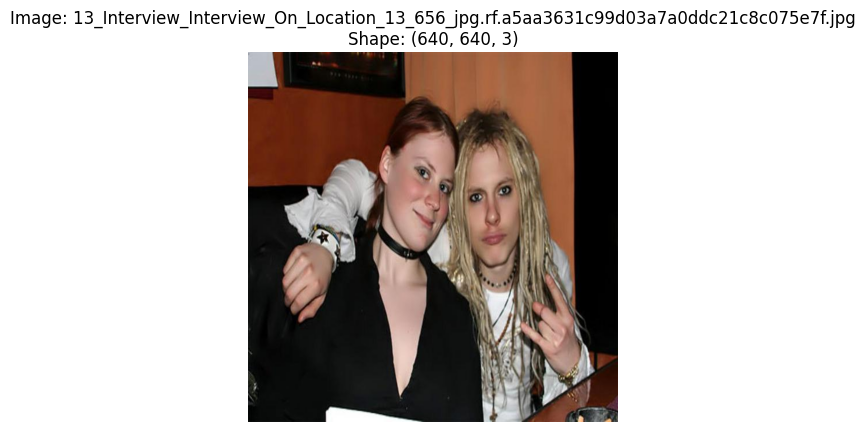

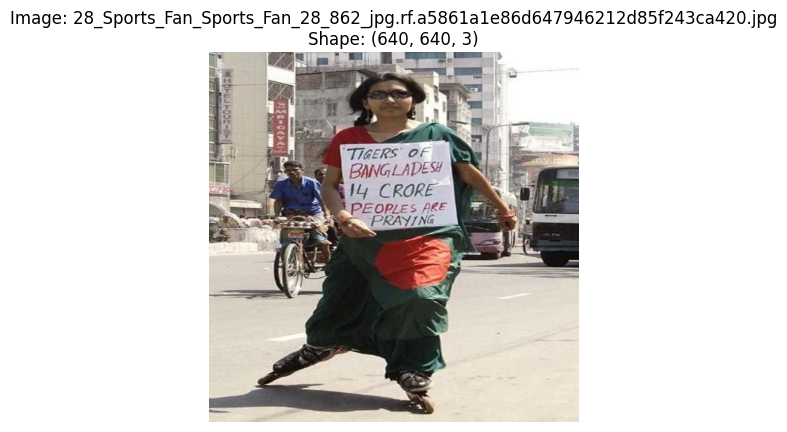

In [ ]:
# # Load image paths
# test_train_img_path = test_train_imgs.iloc[0]["Image_Name"]
# valid_img_path = valid_imgs.iloc[0]["Image_Name"]

# # Read the images
# test_train_image = mpimg.imread(test_train_img_path)
# valid_image = mpimg.imread(valid_img_path)

# # Display an image
# def display_image(image, image_path):
#     if image is not None:
#         plt.imshow(image)
#         plt.title(f"Image: {image_path.split('/')[-1]}\nShape: {image.shape}")
#         plt.axis('off')
#         plt.show()
#     else:
#         print(f"Could not load image from {image_path}")

# # Display train and validation images
# for image, image_path in [[test_train_image, test_train_img_path], [valid_image, valid_img_path]]:
#     display_image(image, image_path)


Setup visualization utilities

In [ ]:
# def draw_bounding_box_on_image(image, ymin, xmin, ymax, xmax, color='r', thickness=2):
#     """
#     Adds a bounding box to an image using Matplotlib.

#     Args:
#       image: A numpy array (image).
#       ymin: ymin of bounding box.
#       xmin: xmin of bounding box.
#       ymax: ymax of bounding box.
#       xmax: xmax of bounding box.
#       color: Color to draw bounding box. Default is red.
#       thickness: Line thickness. Default value is 2.
#     """
#     plt.plot([xmin, xmax], [ymin, ymin], color=color, linewidth=thickness)  # Top line
#     plt.plot([xmin, xmax], [ymax, ymax], color=color, linewidth=thickness)  # Bottom line
#     plt.plot([xmin, xmin], [ymin, ymax], color=color, linewidth=thickness)  # Left line
#     plt.plot([xmax, xmax], [ymin, ymax], color=color, linewidth=thickness)  # Right line


# def draw_bounding_boxes_on_image(image, boxes, colors=None, thickness=2):
#     """
#     Draws multiple bounding boxes on an image using Matplotlib.

#     Args:
#       image: A numpy array (image).
#       boxes: A 2D numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
#              The coordinates are in normalized format between [0, 1].
#       colors: List of colors for each box.
#       thickness: Line thickness for boxes.
#     """
#     if colors is None:
#         colors = ['r'] * len(boxes)  # Default to red if no colors provided

#     plt.imshow(image)
#     for i, box in enumerate(boxes):
#         draw_bounding_box_on_image(image, box[0], box[1], box[2], box[3], color=colors[i], thickness=thickness)
#     plt.axis('off')  # Turn off axis for a cleaner image
#     plt.show()


# def draw_bounding_boxes_on_image_array(image, boxes, colors=None, thickness=2):
#     """
#     Draws multiple bounding boxes on a numpy array image.

#     Args:
#       image: A numpy array (image).
#       boxes: A 2D numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
#              The coordinates are in normalized format between [0, 1].
#       colors: List of colors for each box.
#       thickness: Line thickness for boxes.
#     """
#     draw_bounding_boxes_on_image(image, boxes, colors, thickness)
#     return image


In [ ]:
# # Matplotlib config (minimal)
# plt.rc('image', cmap='gray')
# plt.rc('axes', titlesize="large")
# plt.rc('text', color='black')
# plt.rc('figure', facecolor='white')

# # Utility function to display digits with their predicted and actual bounding boxes
# def display_digits_with_boxes(images, pred_bboxes, bboxes, iou, title, iou_threshold=0.5, bboxes_normalized=False):
#     """
#     Displays a row of images with predicted and actual bounding boxes, alongside IoU values.

#     Args:
#       images: List of image arrays.
#       pred_bboxes: List of predicted bounding boxes, normalized [ymin, xmin, ymax, xmax].
#       bboxes: List of actual bounding boxes, normalized [ymin, xmin, ymax, xmax].
#       iou: List of IoU values for each image.
#       title: Title of the plot.
#       iou_threshold: Threshold for IoU, below which IoU is colored red.
#       bboxes_normalized: Whether the bounding boxes are normalized or in pixel coordinates.
#     """
#     n = len(images)
#     fig = plt.figure(figsize=(20, 4))
#     plt.title(title)
#     plt.yticks([])
#     plt.xticks([])

#     for i in range(n):
#         ax = fig.add_subplot(1, n, i + 1)
#         bboxes_to_plot = []

#         # Rescale predicted bounding boxes if normalized
#         if len(pred_bboxes) > i:
#             bbox = pred_bboxes[i]
#             if bboxes_normalized:
#                 bbox = [
#                     bbox[0] * images[i].shape[0],  # Rescale ymin
#                     bbox[1] * images[i].shape[1],  # Rescale xmin
#                     bbox[2] * images[i].shape[0],  # Rescale ymax
#                     bbox[3] * images[i].shape[1]   # Rescale xmax
#                 ]
#             bboxes_to_plot.append(bbox)

#         # Rescale actual bounding boxes if normalized
#         if len(bboxes) > i:
#             bbox = bboxes[i]
#             if bboxes_normalized:
#                 bbox = [
#                     bbox[0] * images[i].shape[0],  # Rescale ymin
#                     bbox[1] * images[i].shape[1],  # Rescale xmin
#                     bbox[2] * images[i].shape[0],  # Rescale ymax
#                     bbox[3] * images[i].shape[1]   # Rescale xmax
#                 ]
#             bboxes_to_plot.append(bbox)

#         # Draw both predicted and actual bounding boxes on the image
#         img_to_draw = draw_bounding_boxes_on_image_array(
#             image=images[i],
#             boxes=np.asarray(bboxes_to_plot),
#             colors=['red', 'green']  # Red for predicted, Green for actual
#         )

#         plt.xticks([])  # Hide ticks
#         plt.yticks([])  # Hide ticks
#         plt.imshow(img_to_draw)

#         # Display IoU values under each image
#         if len(iou) > i:
#             color = "black"
#             if iou[i] < iou_threshold:
#                 color = "red"
#             ax.text(0.2, -0.3, f"IoU: {iou[i]:.2f}", color=color, transform=ax.transAxes)

#     plt.show()


# # Utility to display training and validation curves
# def plot_metrics(history, metric_name, title, ylim=5):
#     """
#     Plots training and validation curves for a given metric.

#     Args:
#       history: Keras history object from model training.
#       metric_name: The name of the metric to plot (e.g., 'accuracy').
#       title: Title of the plot.
#       ylim: The y-axis limit for the plot.
#     """
#     plt.title(title)
#     plt.ylim(0, ylim)

#     plt.plot(history.history[metric_name], color='blue', label=metric_name)
#     plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)

#     plt.legend()
#     plt.show()

YOLO implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, UpSampling2D, Concatenate
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
# Define YOLO model architecture with a pretrained feature extractor
# This is not YOLO
# This is technically yolo with 1x1 grid
def create_yolo_model(input_shape=(416, 416, 3), num_classes=1):
    input_layer = Input(shape=input_shape)

    # Pretrained feature extractor (e.g., MobileNetV2)
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    x = base_model.output

    # YOLO custom layers
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Output layer: bounding box predictions (x, y, width, height, confidence)
    output_layer = Conv2D(num_classes + 5, (1, 1), activation='sigmoid', name='output')(x)

    return Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Preprocess image
def preprocess_image(image, target_size=(416, 416)):
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

In [ ]:
# Load dataset as a TensorFlow dataset
def load_dataset(image_folder, bbox_folder, target_size=(416, 416)):
    def parse_file(image_path):
        base_name = tf.strings.split(image_path, os.sep)[-1]
        base_name = tf.strings.regex_replace(base_name, '\\.[^.]+$', '')
        bbox_path = tf.strings.join([bbox_folder, '/', base_name, '.txt'])

        # Read and decode image
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, target_size)
        image = image / 255.0

        # Read bounding boxes
        bboxes = tf.io.read_file(bbox_path)
        bboxes = tf.strings.split(bboxes, '\n')
        bboxes = tf.strings.to_number(tf.strings.split(bboxes, ' '))
        return image, bboxes

    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
    dataset = Dataset.from_tensor_slices(image_files)
    dataset = dataset.map(parse_file, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)
    return dataset

In [ ]:
# YOLO loss function
def yolo_loss(y_true, y_pred):
    mse = MeanSquaredError()
    if y_true is None or y_pred is None:
        raise ValueError("y_true and y_pred cannot be None")
    return mse(y_true, y_pred)

In [ ]:
image_folder = "/content/WIDER-FACE-1/test/images"
bbox_folder = "/content/WIDER-FACE-1/test/labels"

# Load dataset
dataset = load_dataset(image_folder, bbox_folder)

# Create YOLO model
model = create_yolo_model()

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss=yolo_loss)

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


In [ ]:
# Train model
model.fit(dataset, epochs=10)

Epoch 1/10


ValueError: None values not supported.

In [ ]:
# Test on a new image
test_image_path = "/content/WIDER-FACE-1/valid/images/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_330_jpg.rf.81c7a7f93f3c8b226ff480297d31e629.jpg"
test_image = cv2.imread(test_image_path)
input_image = preprocess_image(test_image)
input_image = np.expand_dims(input_image, axis=0)

predictions = model.predict(input_image)

# Decode predictions and visualize
for pred in predictions[0]:
    x, y, w, h, confidence = pred[:5]
    if confidence > 0.5:  # Confidence threshold
        x = int(x * test_image.shape[1])
        y = int(y * test_image.shape[0])
        w = int(w * test_image.shape[1])
        h = int(h * test_image.shape[0])
        cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Faces")
plt.show()

##### HOG + SVC

In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import LinearSVC
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
def display_bounding_boxes(image_path, bbox_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the bounding box file
    with open(bbox_path, 'r') as f:
        for line in f:
            parts = list(map(float, line.strip().split()))
            if len(parts) != 5:
                continue
            _, center_x, center_y, width, height = parts
            x = int((center_x - width / 2) * image.shape[1])
            y = int((center_y - height / 2) * image.shape[0])
            w = int(width * image.shape[1])
            h = int(height * image.shape[0])

            # Draw the rectangle on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Bounding Boxes")
    plt.show()

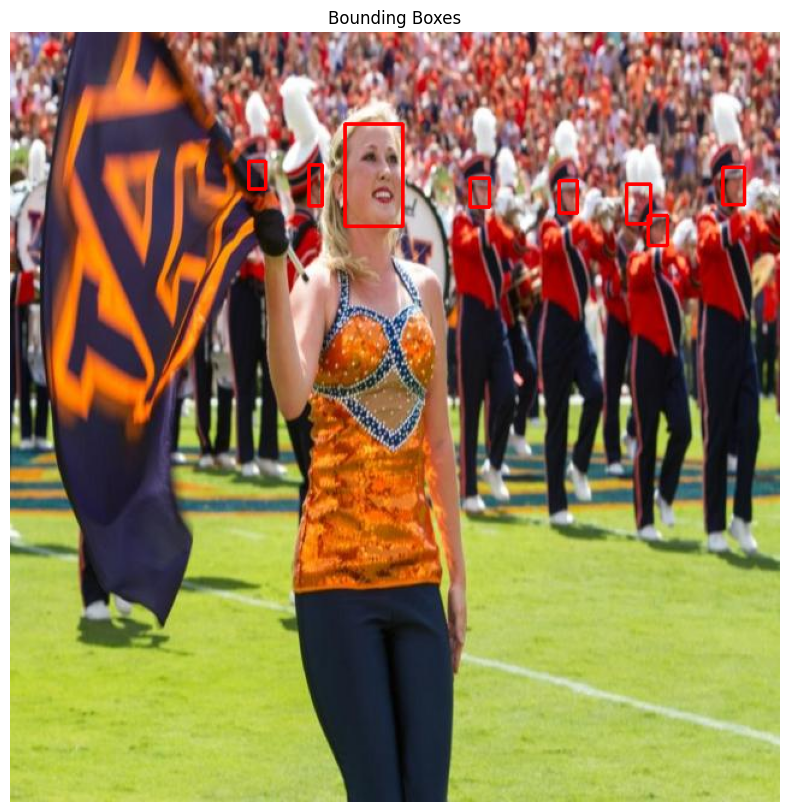

In [ ]:
# Example usage
image_path = "/content/WIDER-FACE-1/test/images/10_People_Marching_People_Marching_2_722_jpg.rf.bc9ef9762037306a31f3db00103d71dd.jpg"
bbox_path = "/content/WIDER-FACE-1/test/labels/10_People_Marching_People_Marching_2_722_jpg.rf.bc9ef9762037306a31f3db00103d71dd.txt"
display_bounding_boxes(image_path, bbox_path)

In [ ]:
def load_data_generator(image_folder, bbox_folder, win_size):
    """A generator that yields images and labels for training."""
    file_list = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    for filename in tqdm(file_list, desc="Loading data"):
        img_path = os.path.join(image_folder, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        base_name = os.path.splitext(filename)[0]

        bbox_path = os.path.join(bbox_folder, base_name + '.txt')
        if not os.path.exists(bbox_path):
            continue

        with open(bbox_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                if len(parts) != 5:
                    continue
                _, center_x, center_y, width, height = parts
                x = int((center_x - width / 2) * image.shape[1])
                y = int((center_y - height / 2) * image.shape[0])
                w = int(width * image.shape[1])
                h = int(height * image.shape[0])

                face = image[y:y + h, x:x + w]
                if face.shape[0] > 0 and face.shape[1] > 0:
                    face_resized = cv2.resize(face, win_size)
                    yield face_resized, 1

                neg_x = np.random.randint(0, image.shape[1] - win_size[0])
                neg_y = np.random.randint(0, image.shape[0] - win_size[1])
                neg_sample = image[neg_y:neg_y + win_size[1], neg_x:neg_x + win_size[0]]
                if neg_sample.shape[0] > 0 and neg_sample.shape[1] > 0:
                    yield cv2.resize(neg_sample, win_size), 0

In [ ]:
def extract_hog_features(image, cell_size=(8, 8), block_size=(2, 2), nbins=9):
    """Extract HOG features for a single image."""
    return hog(image,
               pixels_per_cell=cell_size,
               cells_per_block=block_size,
               orientations=nbins,
               block_norm='L2-Hys',
               feature_vector=True)

In [ ]:
def train_svm(generator, win_size, batch_size=1000):
    """Train the SVM incrementally using batches from the data generator."""
    svm = LinearSVC()
    X, y = [], []
    count = 0

    for image, label in tqdm(generator, desc="Training batches", unit="samples"):
        features = extract_hog_features(image)
        X.append(features)
        y.append(label)
        count += 1

        if count % batch_size == 0:
            print(f"Training batch {count // batch_size}...")
            if hasattr(svm, 'partial_fit'):
                svm.partial_fit(X, y, classes=np.array([0, 1]))
            else:
                svm.fit(X, y)
            X, y = [], []

    if X:
        print("Final training batch...")
        if hasattr(svm, 'partial_fit'):
            svm.partial_fit(X, y, classes=np.array([0, 1]))
        else:
            svm.fit(X, y)

    return svm

In [ ]:
def detect_faces(image, svm, win_size, step_size=8):
    """Detect faces in an image using the trained SVM and sliding window."""
    detected_boxes = []
    h, w = image.shape
    for y in tqdm(range(0, h - win_size[1], step_size), desc="Sliding window (vertical)"):
        for x in range(0, w - win_size[0], step_size):
            window = image[y:y + win_size[1], x:x + win_size[0]]
            if window.shape[:2] == win_size:
                features = extract_hog_features(window)
                if svm.predict([features])[0] == 1:
                    detected_boxes.append((x, y, win_size[0], win_size[1]))
    return detected_boxes

In [ ]:
image_folder = "/content/WIDER-FACE-1/test/images"
bbox_folder = "/content/WIDER-FACE-1/test/labels"
win_size = (64, 64)

# Load data incrementally
data_generator = load_data_generator(image_folder, bbox_folder, win_size)

# Train the SVM
svm = train_svm(data_generator, win_size)



Training batches: 0samples [00:00, ?samples/s]

Loading data:   0%|          | 0/12877 [00:00<?, ?it/s]

Training batch 1...
Training batch 2...
Training batch 3...
Training batch 4...
Training batch 5...
Training batch 6...
Training batch 7...
Training batch 8...
Training batch 9...
Training batch 10...
Training batch 11...
Training batch 12...
Training batch 13...
Training batch 14...
Training batch 15...
Training batch 16...
Training batch 17...
Training batch 18...
Training batch 19...
Training batch 20...
Training batch 21...
Training batch 22...
Training batch 23...
Training batch 24...
Training batch 25...
Training batch 26...
Training batch 27...
Training batch 28...
Training batch 29...
Training batch 30...
Training batch 31...
Training batch 32...
Training batch 33...
Training batch 34...
Training batch 35...
Training batch 36...
Training batch 37...
Training batch 38...
Training batch 39...
Training batch 40...
Training batch 41...
Training batch 42...
Training batch 43...
Training batch 44...
Training batch 45...
Training batch 46...
Training batch 47...
Training batch 48...
T

AttributeError: 'NoneType' object has no attribute 'shape'

Sliding window (vertical):   0%|          | 0/72 [00:00<?, ?it/s]

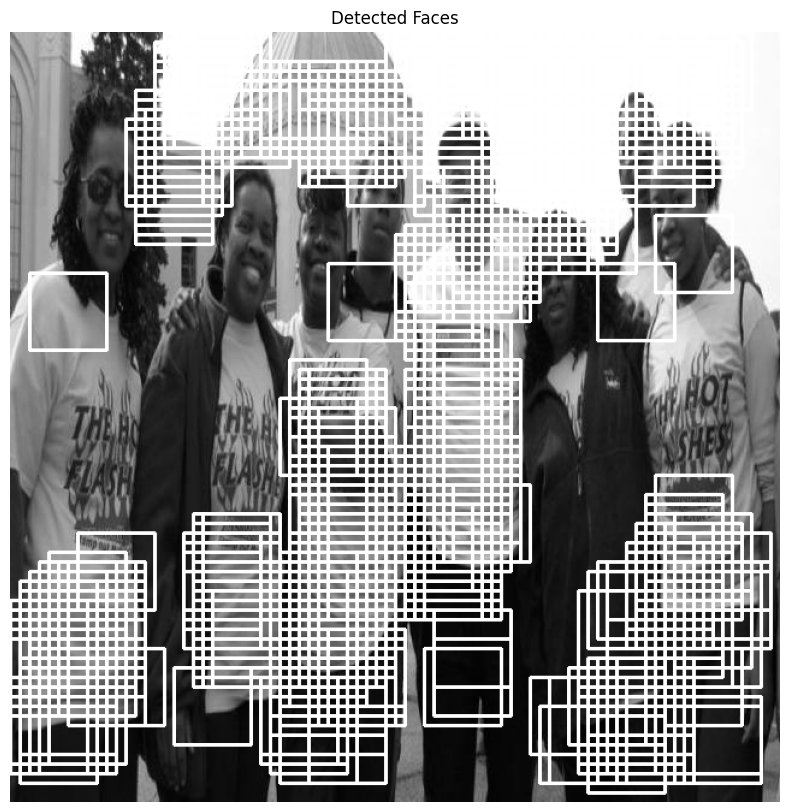

In [ ]:
# Test on a new image
test_image_path = "/content/WIDER-FACE-1/valid/images/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_330_jpg.rf.81c7a7f93f3c8b226ff480297d31e629.jpg"
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
detected_faces = detect_faces(test_image, svm, win_size)

# Draw bounding boxes
for (x, y, w, h) in detected_faces:
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.title("Detected Faces")
plt.show()

##### YOLOv10

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.1 MB/s eta 0:00:00


###### If training is not completed

In [7]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt


In [8]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New h

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

In [9]:
!mkdir -p "/content/drive/MyDrive/Computer Vision Assignment/YOLOv10_Tuned"
!cp -r /content/runs "/content/drive/MyDrive/Computer Vision Assignment/YOLOv10_Tuned/"
!cp /content/yolov8n.pt "/content/drive/MyDrive/Computer Vision Assignment/YOLOv10_Tuned/"

###### If training is complete

In [9]:
!mkdir -p /content/runs
!cp -r "/content/drive/MyDrive/Computer Vision Assignment/YOLOv10_Tuned/runs/detect" /content/runs

In [10]:
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 640x640 1 face, 12.3ms
Speed: 8.0ms preprocess, 12.3ms inference, 317.5ms postprocess per image at shape (1, 3, 640, 640)


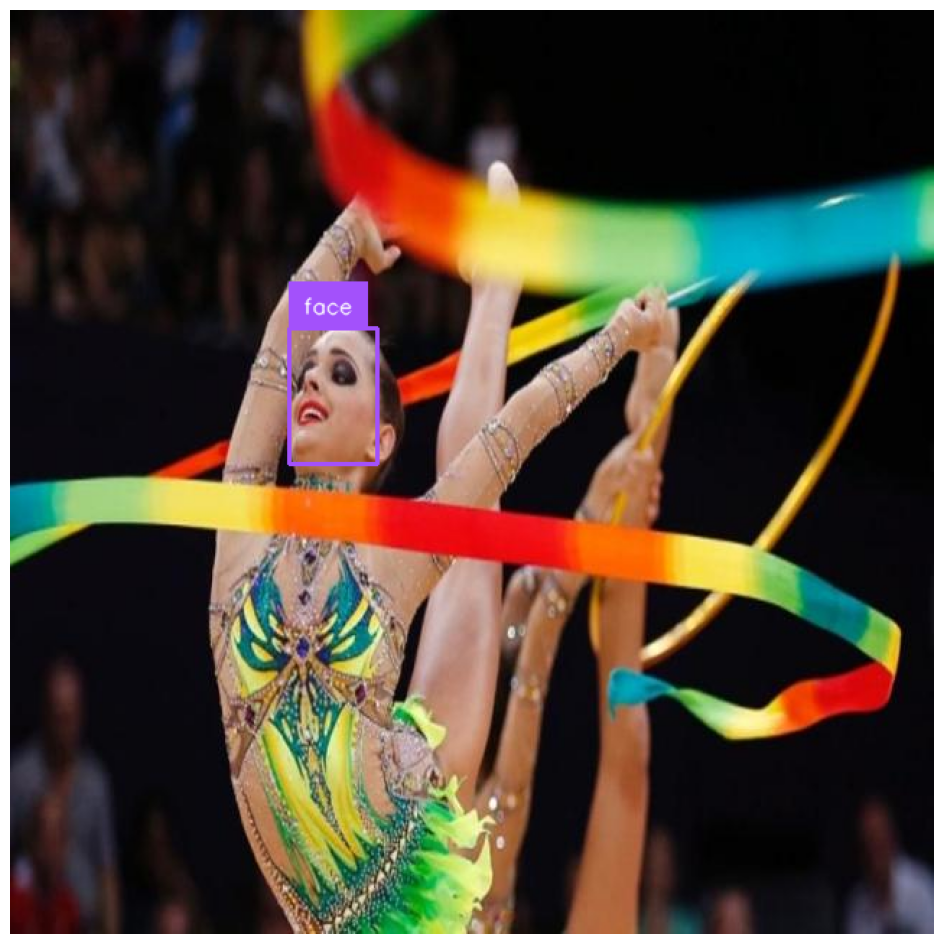

In [11]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [16]:
print(detections.xyxy)

[[     193.59       220.6      254.47      314.09]]
